## Diabetes with Logistic Regression

Logistic Regression is one of the most commonly used Machine Learning algorithms for two-class classification.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

C:\Users\KateTran\AppData\Local\Temp\ipykernel_24512\3654326255.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [ ]:
file_path = r"C:\Users\KateTran\Documents\Kate\Diabete Dataset\diabetes.csv"
data = pd.read_csv(file_path)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


*As shown above, the dataset contains 8 main variables. I am going to group variable columns together.*

In [ ]:
variables = [column for column in data.loc[:,:'Age'].columns]
print(variables)

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


*Next, let's check the size of this dataset and the number of null values!*

In [ ]:
print("Shape of data {}". format(data.shape))
print("Number of columns: {}". format(data.shape[0]))
print("Number of rows: {}".format(data.shape[1]))

Shape of data (768, 9)
Number of columns: 768
Number of rows: 9


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

*Great! There is no null value in this dataset.*

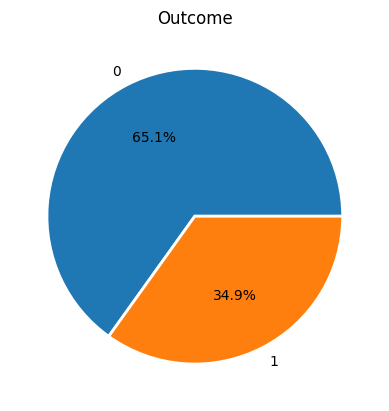

In [ ]:
#Checking Outcome Distribution
count_outcome = data['Outcome'].value_counts()
plt.pie(count_outcome, labels=count_outcome.index, autopct='%.1f%%', wedgeprops={'linewidth': 2.0, 'edgecolor': 'white'})
plt.title('Outcome')
plt.show()

The outcome is well-balanced.

### Understanding Data

In [ ]:
#Prescriptive Statistics
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


*Let's dive deeper to understand which variables are well correlated with the outcome by performing correlation analysis. This analysis highlights the strength and direction of the relationship between variables.*

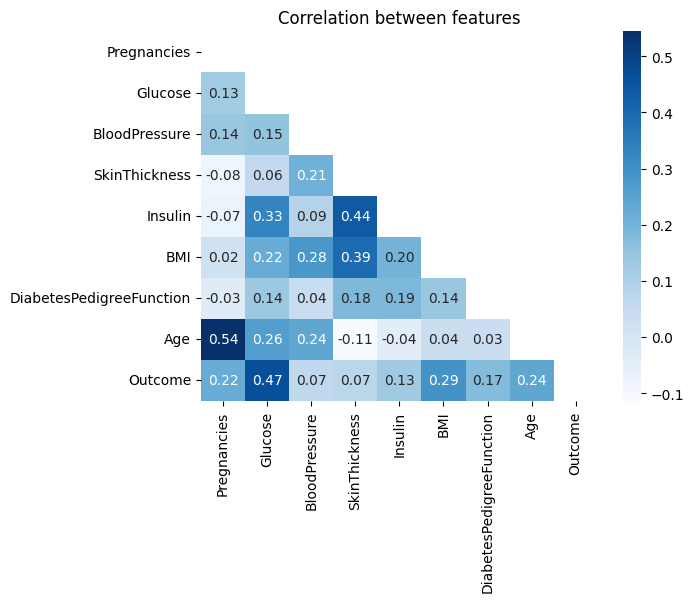

In [ ]:
#Calculate the correlation matrix between features
corr_matrix = data.corr()

#Create the heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, cmap= 'Blues', annot= True, fmt = '.2f', mask=mask)
plt.title('Correlation between features')
plt.show()

**Observation**: *The correlation coefficient between Glucose and Outcome is the highest of 0.47, suggesting that Glucose is the most important feature in prepdicting the outcome. BMI, Age and Pregnancies are also shown some positive correlation to the Outcome.* 

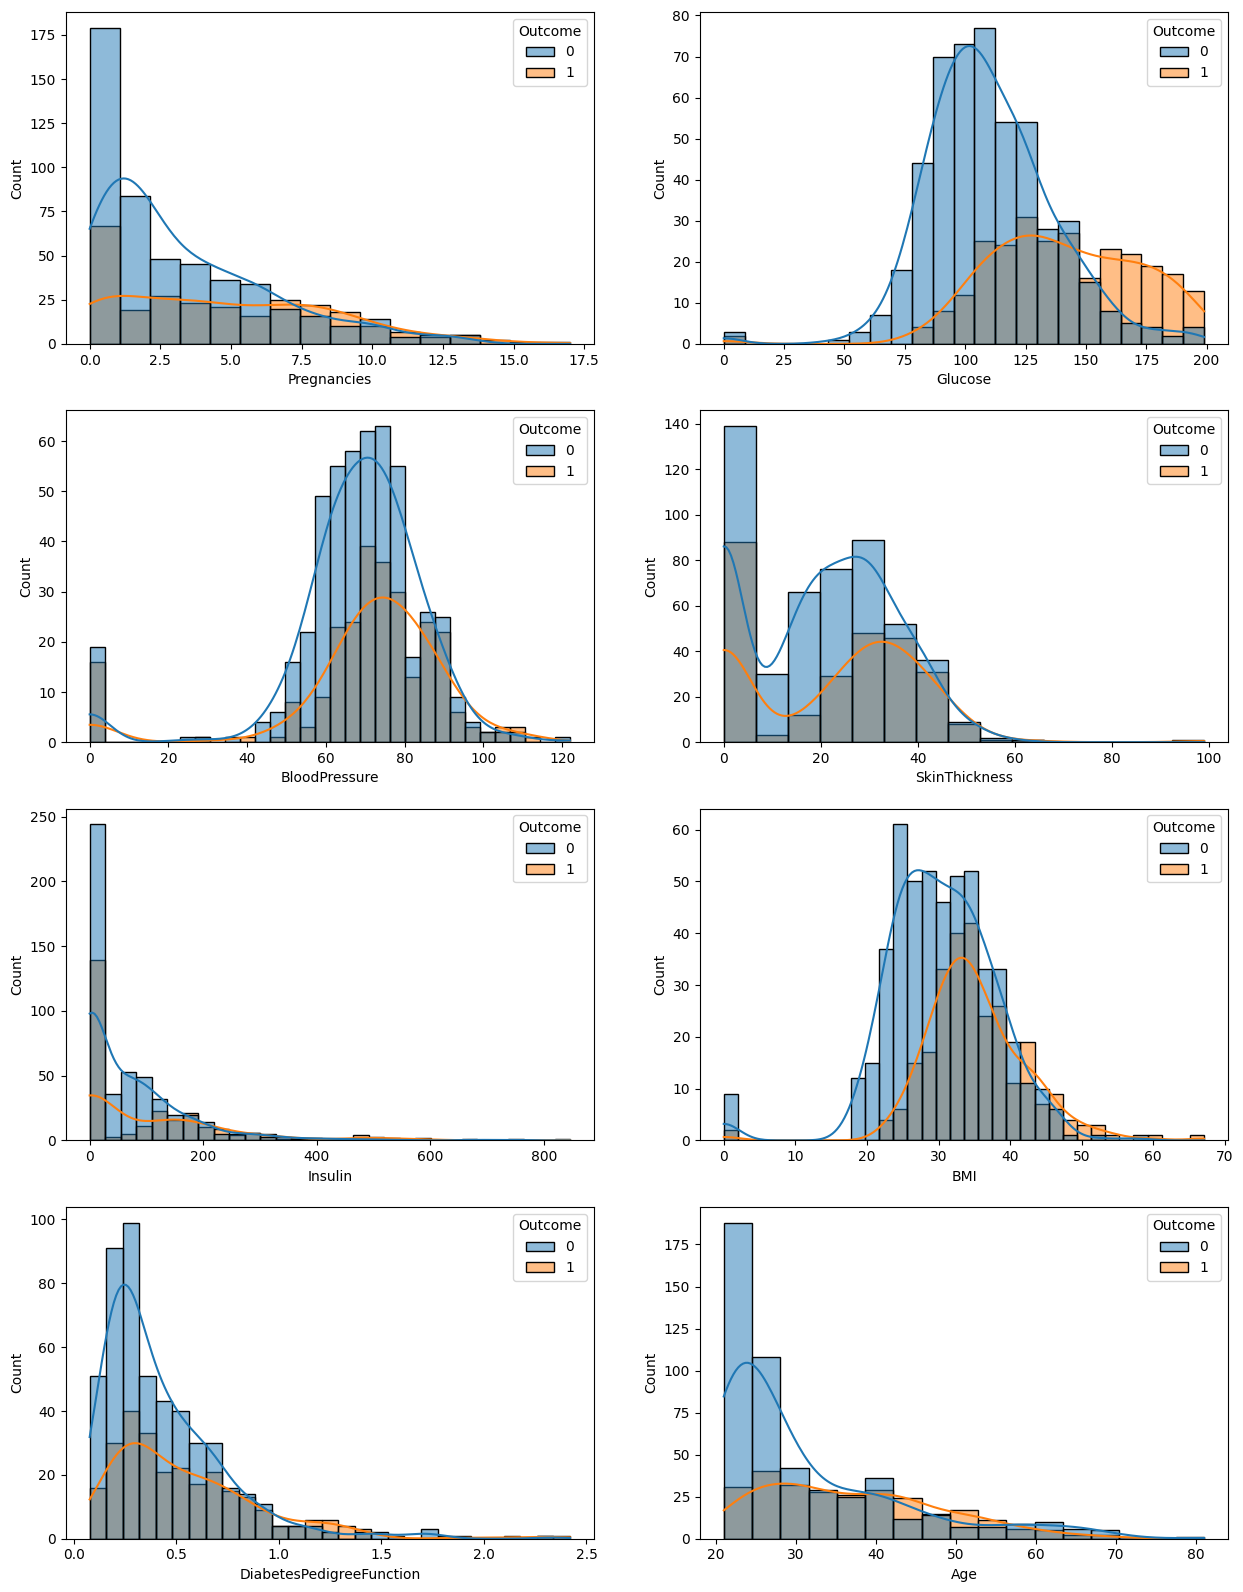

In [ ]:
plt.figure(figsize = [15,25])
i=1
for name in features:
    plt.subplot(5,2,i)
    sns.histplot(data=data, x=name, hue= 'Outcome', kde=True)
    i+=1

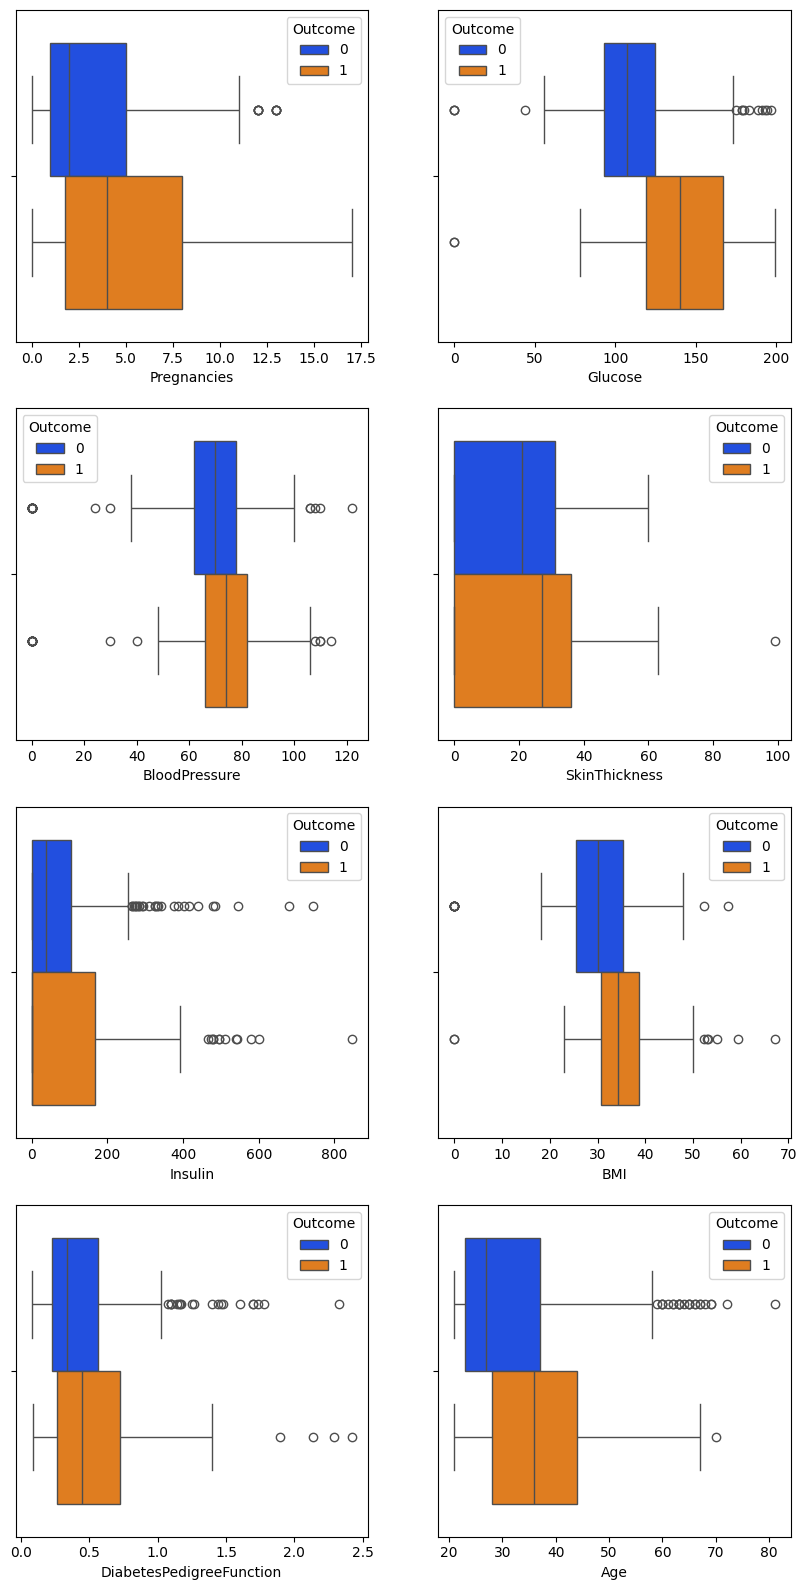

In [ ]:
plt.figure(figsize = [10,25])
i=1
for name in features:
    plt.subplot(5,2,i)
    sns.boxplot(data =data, x=name, hue=data['Outcome'])
    i+=1

### Prepare training and testing dataset for Logistic Regression Model

In [ ]:
# Select variables
X = pd.DataFrame (data , columns = ["Pregnancies" , "Glucose" , "BloodPressure" , "SkinThickness" , "Insulin" , "BMI"
                                   , "DiabetesPedigreeFunction" , "Age"]) # Variables
y = data.Outcome # Target variables

# Training_set = 30% and Testing_set = 70%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)

In [ ]:
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (537, 8)
X_test shape:  (231, 8)
y_train shape:  (537,)
y_test shape:  (231,)


In [ ]:
logreg = LogisticRegression (solver="liblinear")

logreg.fit (X_train , y_train)                     # Fitting a  model    
y_pred = logreg.predict(X_test)                    # Predicted class labels from test features
y_predicted_proba = logreg.predict_proba(X_test)   # Predicted probabilities from test features

Model Evaluation using Confusion Matrix

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[142,  15],
       [ 35,  39]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix')

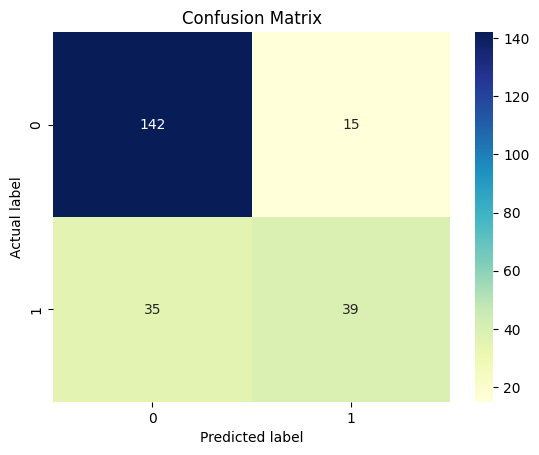

In [ ]:
# Visualizing Confusion Matrix using Heatmap
# Name  of classes
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# Create heatmap
sns.heatmap(data =pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("bottom")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')

Confusion matrix shows the actual and predicted counts of each class.